# 非線形計画法をpythonで実行するための方法

## 1. 非線形計画法 : 制約無し (目的関数が非線形)  
Unconstrained minimization of multivariate scalar functions (minimize)  
今回は  
from scipy.optimize import minimize  
でscipy.optimize を利用する。  
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#unconstrained-minimization-of-multivariate-scalar-functions-minimize  
今回は、Nelder-Mead Simplex algorithm (method='Nelder-Mead')を利用する  
https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html

### 例題1.1 ローゼンブロック関数 $f(x) = \sum_{i = 1}^{N-1}(100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2)$  の最小値を求める。理論値は$x = 1$となる。

In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def rosenbrock(x):
    value = 0
    for i in range(len(x)-1):
        value += 100 * (x[i+1] - x[i])**2 + (1 - x[i])**2.0
    return value

In [3]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2]) #5変数で実施する。今回の初期値
res = minimize(rosenbrock, #目的関数
               x0, #初期値 
               method='nelder-mead', #最適化手法(今回は'Nelder-Mead')
               options={'xatol': 1e-8, #収束判定値(Nelder-Mead法)
                        'disp': True, #結果表示
                        'maxiter': 500 #繰り返し回数
                       })
print(res['x'])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 456
         Function evaluations: 735
[1. 1. 1. 1. 1.]


### 例題1.2 $f(x_1, x_2) = \frac{1}{2}(x_1 - x_2^2)^2 + \frac{1}{4}(x_2 - 2)^4$  
最小解は$(x_1, x_2) = (4, 2)$  
矢部博 八巻直一, 非線形計画法, 朝倉書店, 1999, P32

In [4]:
def f1_2(x):
    return 1 / 2 * (x[0] - x[1]**2)**2 + 1 / 4 * (x[1] - 2)**4

In [5]:
x0 = np.array([1.3, 0.7]) #2変数で実施する。今回の初期値
res = minimize(f1_2, #目的関数
               x0, #初期値 
               method='nelder-mead', #最適化手法(今回は'Nelder-Mead')
               options={'xatol': 1e-8, #収束判定値(Nelder-Mead法)
                        'disp': True, #結果表示
                        'maxiter': 500 #繰り返し回数
                       })
print(res['x'])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 124
         Function evaluations: 240
[4.00000008 2.00000002]


### 例題1.3 $f(x_1, x_2) = x_1^2 + (x_2 - 1)^4 + x_1$
最小解は$(x_1, x_2) = (-\frac{1}{2}, 1)$  
矢部博 八巻直一, 非線形計画法, 朝倉書店, 1999, P128

In [6]:
def f1_3(x):
    return x[0]**2 + (x[1] - 1)**4 + x[0]

In [7]:
x0 = np.array([1.3, 0.7]) #2変数で実施する。今回の初期値
res = minimize(f1_3, #目的関数
               x0, #初期値 
               method='nelder-mead', #最適化手法(今回は'Nelder-Mead')
               options={'xatol': 1e-8, #収束判定値(Nelder-Mead法)
                        'disp': True, #結果表示
                        'maxiter': 500 #繰り返し回数
                       })
print(res['x'])

Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 77
         Function evaluations: 174
[-0.5         1.00002561]


### 例題1.4 $f(\mathbf{x}) = \sum_{i = 1}^{n-1}(x_{i} - x_{i+1})^4 + \sum_{i=1}^n (x_i - 1)^2$
最小解は$\mathbf{x}^* = (1, 1, \cdots, 1)$  
$n = 10$, 初期値 $x_0 = (-1, -1, \cdots, -1, 0)$  
矢部博 八巻直一, 非線形計画法, 朝倉書店, 1999, P131

In [8]:
def f1_4(x):
    sum0 = 0
    sum1 = 0
    for i in range(len(x)):
        if i < len(x) - 1:
            sum0 += (x[i] - x[i+1])**4
        sum1 += (x[0] - 1)**2
    return sum0 + sum1

In [9]:
x0 = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, 0]) #10変数で実施する。今回の初期値
res = minimize(f1_4, #目的関数
               x0, #初期値 
               method='nelder-mead', #最適化手法(今回は'Nelder-Mead')
               options={'xatol': 1e-8, #収束判定値(Nelder-Mead法)
                        'disp': True, #結果表示
                        'maxiter': 10000 #繰り返し回数
                       })
print(res['x'])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7212
         Function evaluations: 10001
[1.         0.99999981 0.99999988 0.99999995 0.99999985 0.99999976
 0.99999959 0.9999995  0.99999933 0.99999945]


### 例題1.5 $f(x) = 2x_1^2 - x_1x_2 + 2x_2^2$  
初期点 $(x_1, x_2) = (2, 3)$、最適解は $(x_1, x_2) = (0, 0)$のとき  
坂和、西崎 : 数理計画法入門、森北出版、P126 例4.11

In [10]:
def f1_5(x):
  return 2 * x[0]**2 -x[0] * x[1] + 2 * x[1]**2

In [11]:
x0 = np.array([2, 3]) #2変数で実施する。今回の初期値
res = minimize(f1_5, #目的関数
               x0, #初期値 
               method='nelder-mead', #最適化手法(今回は'Nelder-Mead')
               options={'xatol': 1e-8, #収束判定値(Nelder-Mead法)
                        'disp': True, #結果表示
                        'maxiter': 10000 #繰り返し回数
                       })
print(res['x'])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 70
         Function evaluations: 135
[ 5.34851632e-10 -3.86452770e-09]


## ニュートン法について
ニュートン法の公式  
$H \Delta x = -\nabla f$  
$\Delta x = -H^{-1} \nabla f$  
ニュートン法の更新式  
$x_{n + 1} = x_n - H^{-1} \nabla f$

In [12]:
import sympy
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sympy.printing.latex(exp,**options)

sympy.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

### ニュートン法アルゴリズム


1.   $x$の初期値を与える
2.   勾配$\nabla f$とヘッセ行列$H$の$x$における値を計算する
3.   次の連立方程式の解$\Delta x$を計算する。またはヘッセ行列の逆行列$H^{-1}$を求めて、$\Delta x = -H^{-1}\nabla f$を計算する
4.   $x$を次の式で更新する。$x \leftarrow x + \Delta x$または、$x \leftarrow x - H^{-1}\nabla f$
5.   $||\Delta x|| < \delta$ なら$x$を返して終了する。そうでなければステップ2に戻る

金谷、これならわかる最適化数学、共立出版、P90 アルゴリズム3.4 多変数のニュートン法

ニュートン法は収束が非常に速い優れた方法であるが、欠点が２つある。


1.   ヘッセ行列を計算するために、全ての2階導関数が必要になる
2.   ヘッセ行列からその逆関数を計算しなければならない。逆行列を計算することは連立１次方程式の回を求めることに等価であり、一般には$n$個の変数に対して、$n^3$に比例する回数の演算が必要になる。








### 例題1.6 ニュートン法
数理計画法入門、森北 P129 例4.12  
$f(x) = 2x_1^2 - x_1 x_2 + 2x_2^2$  
最適解 $(x_1, x_2) = (0, 0)$

ニュートン法では、ヘッセ行列の逆行列を計算するので、1回当たりの計算量が多くて、しかもかなりの記憶容量を必要とする欠点がある。またヘッセ行列が正定でなければ、降下方向を定めるために行列に修正を施さなければならない。

In [13]:
sympy.var('x1')
sympy.var('x2')
f = 2*x1**2 -x1*x2 + 2*x2**2 #数理計画法入門
f 

    2               2
2⋅x₁  - x₁⋅x₂ + 2⋅x₂ 

In [14]:
#微分
dfx1 = sympy.diff(f, x1, 1)
dfx2 = sympy.diff(f, x2, 1)
d2fx1 = sympy.diff(f, x1, 2)
d2fx1x2 = sympy.diff(f, x1, x2, 1)
d2fx2 = sympy.diff(f, x2, 2)

In [15]:
#Δf
deltaf = sympy.Matrix([dfx1, dfx2])
deltaf

⎡4⋅x₁ - x₂ ⎤
⎢          ⎥
⎣-x₁ + 4⋅x₂⎦

In [16]:
#ヘッセ行列
H = sympy.Matrix([[d2fx1,d2fx1x2], [d2fx1x2, d2fx2]])
H

⎡4   -1⎤
⎢      ⎥
⎣-1  4 ⎦

In [17]:
#ヘッセ行列の逆行列
H_inv = H.inv()
H_inv

⎡4/15  1/15⎤
⎢          ⎥
⎣1/15  4/15⎦

In [18]:
#ヘッセ行列の逆行列の値を返す
def getHinv(val):
  return H_inv.subs({x1:val[0], x2: val[1]})

In [19]:
#Δfの値を返す関数
def getDf(val):
  return [dfx1.subs({x1:val[0], x2:val[1]}), dfx2.subs({x1:val[0],x2:val[1]})]

In [20]:
#ヘッセ行列の逆行列とΔfの積を返す関数
def getHinvDeltaf(val):
  return np.dot(np.array(getHinv(val).tolist(), dtype=float), np.array(getDf(val), dtype=float))

In [21]:
getHinvDeltaf([2,3]) 

array([2., 3.])

In [22]:
#ニュートン法で収束まで繰り返し
x = np.array([2, 3], dtype=float)
for i in range(10):
  x -= getHinvDeltaf(x)
  print('{0}回目のx = {1}'.format(i, x)) 
#この場合は1回で収束

0回目のx = [0. 0.]
1回目のx = [0. 0.]
2回目のx = [0. 0.]
3回目のx = [0. 0.]
4回目のx = [0. 0.]
5回目のx = [0. 0.]
6回目のx = [0. 0.]
7回目のx = [0. 0.]
8回目のx = [0. 0.]
9回目のx = [0. 0.]


In [23]:
#ヘッセ行列の値を返す関数 (複数の変数に代入するときは、辞書を使う)
def getHesse(val):
  return H.subs({x1:val[0], x2: val[1]})

### 例題1.7 ニュートン法
福島、新版 数理計画入門 P118 表4.2  
$f(x) = (x_1 - 1)^2 + 10(x_1^2 - x_2)^2$  
最適解は$(x_1, x_2) = (1, 1)$のとき

全ての点において、ヘッセ行列が半正定値になるような関数が凸関数であるから、全ての点においてヘッセ行列が正定値であるような関数は凸関数のさらに特別な場合にあたる。一般の非線形関数に対しては、ヘッセ行列の正定値性は普通局所的にしか保証されない。

In [24]:
sympy.var('x1')
sympy.var('x2')
f = (x1 -1)**2 + 10*(x1**2 -x2)**2
f 

                         2
        2      ⎛  2     ⎞ 
(x₁ - 1)  + 10⋅⎝x₁  - x₂⎠ 

In [25]:
#微分
dfx1 = sympy.diff(f, x1, 1)
dfx2 = sympy.diff(f, x2, 1)
d2fx1 = sympy.diff(f, x1, 2)
d2fx1x2 = sympy.diff(f, x1, x2, 1)
d2fx2 = sympy.diff(f, x2, 2)

In [26]:
#Δf
deltaf = sympy.Matrix([dfx1, dfx2])
deltaf

⎡      ⎛  2     ⎞           ⎤
⎢40⋅x₁⋅⎝x₁  - x₂⎠ + 2⋅x₁ - 2⎥
⎢                           ⎥
⎢            2              ⎥
⎣     - 20⋅x₁  + 20⋅x₂      ⎦

In [27]:
#ヘッセ行列
H = sympy.Matrix([[d2fx1,d2fx1x2], [d2fx1x2, d2fx2]])
H

⎡  ⎛     2            ⎞        ⎤
⎢2⋅⎝60⋅x₁  - 20⋅x₂ + 1⎠  -40⋅x₁⎥
⎢                              ⎥
⎣        -40⋅x₁            20  ⎦

In [28]:
#ヘッセ行列の値を返す関数 (複数の変数に代入するときは、辞書を使う)
def getHesse(val):
  return H.subs({x1:val[0], x2: val[1]})

In [29]:
#ヘッセ行列の逆行列
H_inv = H.inv()
H_inv

⎡        1                    x₁          ⎤
⎢──────────────────   ──────────────────  ⎥
⎢     2                    2              ⎥
⎢40⋅x₁  - 40⋅x₂ + 2   20⋅x₁  - 20⋅x₂ + 1  ⎥
⎢                                         ⎥
⎢                           2             ⎥
⎢        x₁            60⋅x₁  - 20⋅x₂ + 1 ⎥
⎢──────────────────  ─────────────────────⎥
⎢     2                    2              ⎥
⎣20⋅x₁  - 20⋅x₂ + 1  400⋅x₁  - 400⋅x₂ + 20⎦

In [30]:
#ヘッセ行列の逆行列の値を返す
def getHinv(val):
  return H_inv.subs({x1:val[0], x2: val[1]})

In [31]:
#Δfの値を返す関数
def getDf(val):
  return [dfx1.subs({x1:val[0], x2:val[1]}), dfx2.subs({x1:val[0],x2:val[1]})]

In [32]:
#ヘッセ行列の逆行列とΔfの積を返す関数
def getHinvDeltaf(val):
  return np.dot(np.array(getHinv(val).tolist(), dtype=float), np.array(getDf(val), dtype=float))

In [33]:
#ニュートン法で収束まで繰り返し
x = np.array([0, 0], dtype=float)
for i in range(10):
  x -= getHinvDeltaf(x)
  print('{0}回目のx = {1}'.format(i, x)) 
#この場合は1回で収束

0回目のx = [1. 0.]
1回目のx = [1. 1.]
2回目のx = [1. 1.]
3回目のx = [1. 1.]
4回目のx = [1. 1.]
5回目のx = [1. 1.]
6回目のx = [1. 1.]
7回目のx = [1. 1.]
8回目のx = [1. 1.]
9回目のx = [1. 1.]


## 準ニュートン法
準ニュートン法は、ヘッセ行列を計算することなく、ニュートン法のような速い収束性を持たせようと考案された方法

### 準ニュートン法アルゴリズム


1.   初期設定：初期点$x_0$、正定値対称な初期行列$B_0$を与える。$k=0$とおく
2.   停止条件が満たされていれば、$x_k$を近似解として停止する。さもなければ、3へいく
1.   連立1次方程式 $B_k d = -\nabla f(x_k)$ を解いて探索方法$d_k$を求める
2.   $d_k$方向でのステップ幅$\alpha_k$を求める(直線探索)
1.   $x_{k+1} = x_k +\alpha_k d_k$とおく
2.   $B_k$を更新して$B_{k+1}$を生成する。2へ戻る

八巻、非線形計画法、朝倉書店 P31


### 例1.8 準ニュートン法 (BFGS)
$f(x_1, x_2) = \frac{1}{2}(x_1 - x_2^2)^2 + \frac{1}{4}(x_2 -2)^4$  
最適解は$(x_1, x_2) = (4, 2)$のとき

八巻、非線形計画法、朝倉書店 P32 例2.1


In [34]:
sympy.var('x1')
sympy.var('x2')
f = 1 / 2 * (x1 - x2**2)**2 + 1 / 4 * (x2 - 2)**4 
f 

              2                 
    ⎛       2⎞                 4
0.5⋅⎝x₁ - x₂ ⎠  + 0.25⋅(x₂ - 2) 

In [35]:
#微分
dfx1 = sympy.diff(f, x1, 1)
dfx2 = sympy.diff(f, x2, 1)

In [36]:
#Δf
deltaf = sympy.Matrix([dfx1, dfx2])
deltaf

⎡                      2            ⎤
⎢           1.0⋅x₁ - x₂             ⎥
⎢                                   ⎥
⎢         ⎛       2⎞               3⎥
⎣- 2.0⋅x₂⋅⎝x₁ - x₂ ⎠ + 1.0⋅(x₂ - 2) ⎦

In [37]:
#Δfの値を返す関数
def getDf(val):
  return [dfx1.subs({x1:val[0], x2:val[1]}), dfx2.subs({x1:val[0],x2:val[1]})]

In [38]:
#Bの逆行列と∇fとの行列計算
def getBf(B, val):
  return np.dot(np.linalg.inv(B), np.array(getDf(val), dtype=float))

In [39]:
# Bの更新
def getB(B, s, y):
  bs = np.dot(B, s) #第2項 分子 第１要素
  bsbs = np.dot(bs.reshape(len(bs), 1), bs.reshape(1,len(bs))) #第2項分子：2行1列と1行2列の計算
  sbs = np.dot(s, bs) #第2項 分母 (積の順序に注意: 右側から)
  yy = np.dot(y.reshape(len(y), 1), y.reshape(1,len(y))) # 第3項 分子 2行1列と1行2列の計算
  sy = np.dot(s.T, y) #第3項 分母
  return B - bsbs / sbs + yy / sy

In [40]:
#1. 初期値の設定
B = np.array([[1, -2], [-2, 12]])
x = [0,0]

for i in range(30):
  s = x.copy() #更新前のx
  y = np.array(getDf(x), dtype=float) #更新前の∇f
  x -= + getBf(B, x) #xの更新 3.探索方向を求めて、5. xを更新
  
  s = np.array(x, dtype=float) - np.array(s, dtype=float) #x_k+1 - x_k
  y = np.array(getDf(x), dtype=float) - y #∇f(x_k+1) - ∇f(x_k)
  B = getB(B, s, y)
  print('{0}回目 : x = {1}'.format(i, x))
  print('{0}回目 : s = {1}'.format(i, s))
  print('{0}回目 : y = {1}'.format(i, y))
  print('{0}回目 : B = {1}'.format(i, B))


0回目 : x = [2. 1.]
0回目 : s = [2. 1.]
0回目 : y = [1. 5.]
0回目 : B = [[ 1.14285714 -1.28571429]
 [-1.28571429  7.57142857]]
1回目 : x = [1.46938776 1.30612245]
1回目 : s = [-0.53061224  0.30612245]
1回目 : y = [-1.2365681   3.28389532]
1回目 : B = [[ 1.37307827 -1.65945344]
 [-1.65945344  7.85100539]]
2回目 : x = [1.64209416 1.30646673]
2回目 : s = [0.1727064  0.00034428]
2回目 : y = [ 0.17180695 -0.44826021]
2回目 : B = [[ 1.00001633 -2.62078273]
 [-2.62078273 12.68093241]]
3回目 : x = [1.8574863  1.36394364]
3回目 : s = [0.21539214 0.05747692]
3回目 : y = [ 0.06190519 -0.08517222]
3回目 : B = [[ 1.2748979  -3.70057779]
 [-3.70057779 12.38589673]]
4回目 : x = [2.31482725 1.52073188]
4回目 : s = [0.45734096 0.15678824]
4回目 : y = [0.00505777 0.13275349]
4回目 : B = [[ 1.27580226 -3.68917253]
 [-3.68917253 11.60777897]]
5回目 : x = [2.65277292 1.63819823]
5回目 : s = [0.33794566 0.11746635]
5回目 : y = [-0.03312234  0.1707315 ]
5回目 : B = [[ 1.39923045 -4.307499  ]
 [-4.307499   13.84594009]]
6回目 : x = [2.89174274 1.70864591]
6回

### 例1.9 scipy.optimize.minimize の利用 : Broyden-Fletcher-Goldfarb-Shanno algorithm (method='BFGS')
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#broyden-fletcher-goldfarb-shanno-algorithm-method-bfgs  

$f(x_1, x_2) = \frac{1}{2}(x_1 - x_2^2)^2 + \frac{1}{4}(x_2 -2)^4$  
最適解は$(x_1, x_2) = (4, 2)$のとき

八巻、非線形計画法、朝倉書店 P32 例2.1

In [41]:
sympy.var('x1')
sympy.var('x2')
f = 1 / 2 * (x1 - x2**2)**2 + 1 / 4 * (x2 - 2)**4 
f 


              2                 
    ⎛       2⎞                 4
0.5⋅⎝x₁ - x₂ ⎠  + 0.25⋅(x₂ - 2) 

In [42]:
#目的関数
def f1_9(x):
  return 1 / 2 * (x[0] - x[1]**2)**2 + 1 / 4 * (x[1] - 2)**4 

In [43]:
#微分
dfx1 = sympy.diff(f, x1, 1)
dfx2 = sympy.diff(f, x2, 1)

In [44]:
#Δfの値を返す関数
def getDf(x):
  return np.array([dfx1.subs({x1:x[0], x2:x[1]}), dfx2.subs({x1:x[0],x2:x[1]})], dtype=float)

In [45]:
res = minimize(f1_9, [0,0], method='BFGS', jac=getDf, options={'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


array([3.98110703, 1.9952718 ])

### 例1.10 scipy.optimize.minimizeの利用 Newton-Conjugate-Gradient algorithm (method='Newton-CG')  
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#newton-conjugate-gradient-algorithm-method-newton-cg

$f(x_1, x_2) = \frac{1}{2}(x_1 - x_2^2)^2 + \frac{1}{4}(x_2 -2)^4$  
最適解は$(x_1, x_2) = (4, 2)$のとき

八巻、非線形計画法、朝倉書店 P32 例2.1

In [46]:
sympy.var('x1')
sympy.var('x2')
f = 1 / 2 * (x1 - x2**2)**2 + 1 / 4 * (x2 - 2)**4 
f 

              2                 
    ⎛       2⎞                 4
0.5⋅⎝x₁ - x₂ ⎠  + 0.25⋅(x₂ - 2) 

In [47]:
#目的関数
def f1_9(x):
  return 1 / 2 * (x[0] - x[1]**2)**2 + 1 / 4 * (x[1] - 2)**4 

In [48]:
#微分
dfx1 = sympy.diff(f, x1, 1)
dfx2 = sympy.diff(f, x2, 1)
d2fx1 = sympy.diff(f, x1, 2)
d2fx1x2 = sympy.diff(f, x1, x2, 1)
d2fx2 = sympy.diff(f, x2, 2)

In [49]:
#Δfの値を返す関数
def getDf(x):
  return np.array([dfx1.subs({x1:x[0], x2:x[1]}), dfx2.subs({x1:x[0],x2:x[1]})], dtype=float)

In [50]:
#ヘッセ行列
H = sympy.Matrix([[d2fx1,d2fx1x2], [d2fx1x2, d2fx2]])
H

⎡  1.0                 -2.0⋅x₂             ⎤
⎢                                          ⎥
⎢                         2               2⎥
⎣-2.0⋅x₂  -2.0⋅x₁ + 6.0⋅x₂  + 3.0⋅(x₂ - 2) ⎦

In [51]:
#ヘッセ行列の値を返す関数 (複数の変数に代入するときは、辞書を使う)
def getHesse(x):
  return np.array(H.subs({x1:x[0], x2: x[1]}), dtype=float)

In [52]:
res = minimize(f1_9, [0,0], method='Newton-CG',
               jac=getDf, hess=getHesse,
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 59
         Hessian evaluations: 28


array([3.9394992 , 1.98481738])

### 例1.11 scipy.optimize.minimizeの利用 Trust-Region Newton-Conjugate-Gradient Algorithm (method='trust-ncg')  
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#trust-region-newton-conjugate-gradient-algorithm-method-trust-ncg

$f(x_1, x_2) = \frac{1}{2}(x_1 - x_2^2)^2 + \frac{1}{4}(x_2 -2)^4$  
最適解は$(x_1, x_2) = (4, 2)$のとき

八巻、非線形計画法、朝倉書店 P32 例2.1

In [53]:
res = minimize(f1_9, [0,0], method='trust-ncg',
               jac=getDf, hess=getHesse,
               options={'gtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Hessian evaluations: 31


array([3.98939988, 1.99734821])

### 例1.12 scipy.optimize.minimizeの利用 Trust-Region Truncated Generalized Lanczos / Conjugate Gradient Algorithm (method='trust-krylov')  
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#trust-region-truncated-generalized-lanczos-conjugate-gradient-algorithm-method-trust-krylov

$f(x_1, x_2) = \frac{1}{2}(x_1 - x_2^2)^2 + \frac{1}{4}(x_2 -2)^4$  
最適解は$(x_1, x_2) = (4, 2)$のとき

八巻、非線形計画法、朝倉書店 P32 例2.1

In [54]:
res = minimize(f1_9, [0,0], method='trust-krylov',
               jac=getDf, hess=getHesse,
               options={'gtol': 1e-8, 'disp': True})
res.x

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -2.412102e-01  7.433205e-01  0.000000e+00  0.000000e+00  1.832491e+00  6.960784e+00  1.436620e-01  1.645388e-01

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -1.419805e-01  1.186689e+00  0.000000e+00  0.000000e+00  8.108135e-01  2.315172e+00  4.319334e-01  2.142060e+00

 TR Solving trust region problem, radius 1.000000e+00; starting on first irreducible block
 TR Coldstart. Seeking suitable initial Î»â, starting with 0
 TR Starting Newton iteration for Î»â with initial choice 0.000000e+00
 TR  iter        Î»            dÎ»       âhâ(Î»)â-radius
 TR      1  1.522945e-01  1.522945e-01  8.574606e-05
 TR      2  1.523565e-01  6.194353e-05  1.577516e-11
 TR      3  1.523565e-01  1.139706e-11  0.000000

array([3.92650023, 1.98155528])

### 例1.13 scipy.optimize.minimizeの利用 Trust-Region Nearly Exact Algorithm (method='trust-exact')  
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#trust-region-nearly-exact-algorithm-method-trust-exact

$f(x_1, x_2) = \frac{1}{2}(x_1 - x_2^2)^2 + \frac{1}{4}(x_2 -2)^4$  
最適解は$(x_1, x_2) = (4, 2)$のとき

八巻、非線形計画法、朝倉書店 P32 例2.1

In [55]:
res = minimize(f1_9, [0,0], method='trust-exact',
               jac=getDf, hess=getHesse,
               options={'gtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Hessian evaluations: 29


array([3.99961177, 1.99990294])

### 例題1.14 ローゼンブロック関数 $f(x) = \sum_{i = 1}^{N-1}(100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2)$  の最小値を求める。理論値は$x = 1$となる。  
GA : deapライブラリを用いて解く

In [56]:
!pip install deap

     |████████████████████████████████| 160 kB 8.7 MB/s 


In [57]:
import random
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

In [58]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) #最小化
creator.create("Individual", list, fitness=creator.FitnessMin)

In [59]:
def rosenbrock(x):
    value = 0
    for i in range(len(x)-1):
        value += 100 * (x[i+1] - x[i])**2 + (1 - x[i])**2.0
    return value, #,が必要

In [63]:
toolbox = base.Toolbox()
toolbox.register("attribute", random.uniform, -2,2) #xは a<=x<=b
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, 2) #2変数がせいぜい
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("select", tools.selTournament, tournsize=10)
toolbox.register("mate", tools.cxBlend,alpha=0.3) #ブレンド交叉
toolbox.register("mutate", tools.mutGaussian, mu=[0.0, 0.0], sigma=[10.0,10.0], indpb=0.2)
toolbox.register("evaluate", rosenbrock)

In [61]:
random.seed(64)
NGEN = 500 #繰り返し世代数
POP = 100 #個体の数
CXPB = 0.9 #交叉確率
MUTPB = 0.1 #突然変異確率

In [64]:
pop = toolbox.population(n=POP)
for individual in pop:
    individual.fitness.values = toolbox.evaluate(individual)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof) #Simple GA
best_ind = tools.selBest(pop, 1)[0]
#結果表示
print("最も良い個体は %sで、そのときの目的関数の値は %s" % (best_ind, best_ind.fitness.values))

gen	nevals	avg           	std           	min         	max            
0  	0     	[269.50660361]	[311.41795476]	[0.17451204]	[1360.90707797]
1  	99    	[1388.42756551]	[8647.48253738]	[0.00147562]	[79770.38791465]
2  	90    	[1007.53610863]	[5713.14107727]	[0.00147562]	[49930.96776207]
3  	90    	[575.78154093] 	[5188.90127873]	[0.00515973]	[52004.13208961]
4  	94    	[411.6715738]  	[2012.74014658]	[0.00237568]	[15549.6008604] 
5  	98    	[417.53812281] 	[2469.10390223]	[0.00219692]	[19128.38506495]
6  	92    	[686.67336222] 	[5215.46587247]	[0.00213091]	[51749.40282766]
7  	86    	[270.23428394] 	[1397.59466329]	[0.00213091]	[11430.86443839]
8  	96    	[10.21607925]  	[101.62540804] 	[0.00211913]	[1021.37612217] 
9  	93    	[1510.07649771]	[6879.50374846]	[0.00211521]	[53729.54262646]
10 	88    	[172.45592743] 	[1088.7728372] 	[0.00211288]	[9912.46738982] 
11 	86    	[636.90875988] 	[3758.16429346]	[0.00210382]	[32948.07350907]
12 	90    	[265.98161228] 	[1550.80858744]	[0.00210382]	[

### 例題1.15 Ackley test objective function
https://deap.readthedocs.io/en/master/api/benchmarks.html#deap.benchmarks.ackley

グラフ描画  
https://deap.readthedocs.io/en/master/code/benchmarks/ackley.py

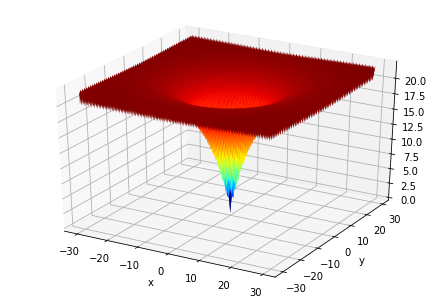

In [71]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from deap.benchmarks import ackley

try:
    import numpy as np
except:
    exit()

from deap import benchmarks

def ackley_arg0(sol):
    return benchmarks.ackley(sol)[0]

fig = plt.figure()
# ax = Axes3D(fig, azim = -29, elev = 50)
ax = Axes3D(fig)
X = np.arange(-30, 30, 0.5)
Y = np.arange(-30, 30, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.fromiter(map(ackley_arg0, zip(X.flat,Y.flat)), dtype=np.float, count=X.shape[0]*X.shape[1]).reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  norm=LogNorm(), cmap=cm.jet, linewidth=0.2)
 
plt.xlabel("x")
plt.ylabel("y")

plt.show()

In [75]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) #最小化
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attribute", random.uniform, -15,30) #xは a<=x<=b
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, 2) #2変数がせいぜい
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("select", tools.selTournament, tournsize=10)
toolbox.register("mate", tools.cxBlend,alpha=0.3) #ブレンド交叉
toolbox.register("mutate", tools.mutGaussian, mu=[0.0, 0.0], sigma=[10.0,10.0], indpb=0.2)
toolbox.register("evaluate", ackley)
random.seed(64)
NGEN = 100 #繰り返し世代数
POP = 100 #個体の数
CXPB = 0.9 #交叉確率
MUTPB = 0.1 #突然変異確率

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [76]:
pop = toolbox.population(n=POP)
for individual in pop:
    individual.fitness.values = toolbox.evaluate(individual)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof) #Simple GA
best_ind = tools.selBest(pop, 1)[0]
#結果表示
print("最も良い個体は %sで、そのときの目的関数の値は %s" % (best_ind, best_ind.fitness.values))

gen	nevals	avg          	std         	min         	max          
0  	0     	[19.12769848]	[2.93317242]	[6.43510559]	[22.10131928]
1  	92    	[12.91516601]	[4.02574676]	[1.55214534]	[21.3970931] 
2  	93    	[6.565852]   	[3.00017777]	[1.1538011] 	[19.77103453]
3  	90    	[3.41228297] 	[1.45435086]	[0.74841369]	[9.98742721] 
4  	90    	[1.51011338] 	[1.92751412]	[0.16101535]	[18.96016441]
5  	91    	[1.08875625] 	[3.2446978] 	[0.04515491]	[18.38015243]
6  	93    	[0.66989941] 	[2.90449273]	[0.01728016]	[20.19783313]
7  	92    	[0.43129177] 	[2.77113256]	[0.00621886]	[20.02043421]
8  	93    	[0.01695833] 	[0.00686854]	[0.00195672]	[0.03209867] 
9  	96    	[0.56244228] 	[3.01395355]	[0.00075254]	[19.42023125]
10 	91    	[0.25604111] 	[1.91225686]	[0.0003065] 	[17.674427]  
11 	92    	[0.00064138] 	[0.00032613]	[0.00018824]	[0.00172461] 
12 	93    	[0.58441669] 	[3.14256901]	[5.59124893e-05]	[21.11038738]
13 	93    	[0.78918115] 	[3.31349538]	[1.72585916e-05]	[18.89157062]
14 	91    	[0.267